In [1]:
#import librarires
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
import numpy as np




In [2]:
#import train data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "../DataSets/mrl-dataset/train", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(244, 244), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)


Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [3]:
#import test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/mrl-dataset/train", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(244, 244), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)


Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [4]:
#classes name
class_names = {0:"closes",1:"open"}
for i in class_names.items():
    print(i)

(0, 'closes')
(1, 'open')


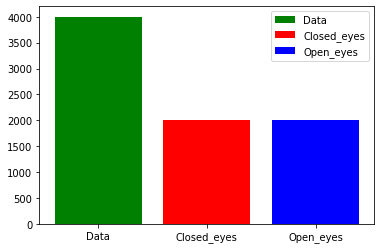

In [5]:
#visulaize data 
fig, ax = plt.subplots()
ax.bar("Data",4000,label="Data",color="g")
ax.bar("Closed_eyes",2000,label="Closed_eyes",color="r")
ax.bar("Open_eyes",2000,label="Open_eyes",color="b")
ax.legend()

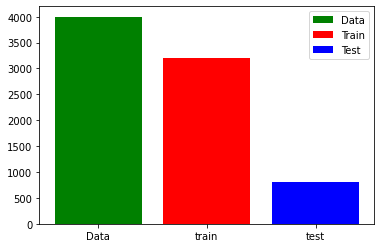

In [6]:
#visulaize data 
fig, ax = plt.subplots()
ax.bar("Data",4000,label="Data",color="g")
ax.bar("train",3200,label="Train",color="r")
ax.bar("test",800,label="Test",color="b")
ax.legend()

In [7]:
#build our model 
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
vgg = keras.Sequential()
for layer in vgg_model.layers:
  vgg.add(layer)
vgg.add(Dropout(0.2))
vgg.add(Dense(2, activation='softmax'))

574717952/574710816 [==============================] - 5s 0us/step


In [8]:
#compile my model
vgg.compile(optimizer=keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
#fit our model
history = vgg.fit(train_data,validation_data=test_data,epochs = 3)

Epoch 1/3
100/100 [==============================] - 685s 7s/step - loss: 0.2081 - accuracy: 0.9129 - val_loss: 0.0093 - val_accuracy: 0.9987
Epoch 2/3
100/100 [==============================] - 644s 6s/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 3/3
100/100 [==============================] - 644s 6s/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0028 - val_accuracy: 0.9987


In [10]:
#evaluate test_data
vgg.evaluate(test_data)

25/25 [==============================] - 129s 5s/step - loss: 0.0028 - accuracy: 0.9987


[0.0027859092224389315, 0.9987499713897705]

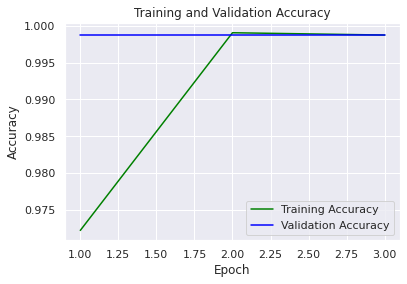

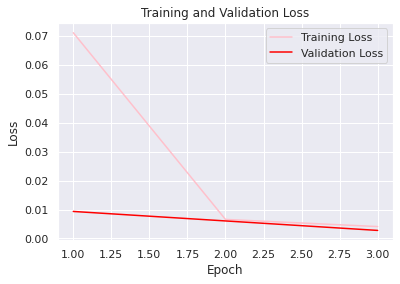

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
#predict model
y_pred = vgg.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

[0]
closes


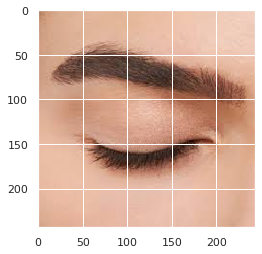

In [13]:
#example 1 
image_path = "../input/test22/download (4).jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
closes


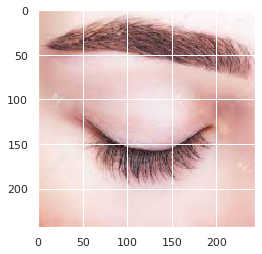

In [14]:
#example 2
image_path = "../input/test22/download (3).jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
open


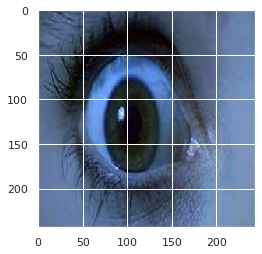

In [15]:
#example 3
image_path = "../input/test22/download (2).jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
open


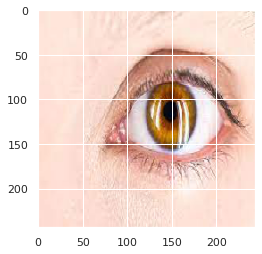

In [16]:
#example 4 
image_path = "../input/test22/download (1).jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
closes


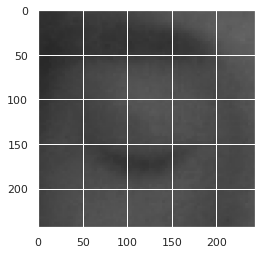

In [17]:
#example 5
image_path = "../input/mrl-dataset/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
open


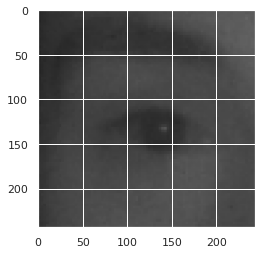

In [18]:
#example 6
image_path = "../input/mrl-dataset/train/Open_Eyes/s0001_02337_0_0_1_0_0_01.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = vgg.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [19]:
#save model h5 
vgg.save("model.h5")
# Convert the model to tensorflow lite 
converter = tf.lite.TFLiteConverter.from_keras_model( vgg)
tfmodel = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

NameError: name 'tflite_model' is not defined